In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
import os
folder_path = r"C:\Users\medici\901"
file_name = "learning1_data.csv"
file_path = os.path.join(folder_path, file_name)

data1 = pd.read_csv(file_path)

print(data1.head())

          0         1         2         3         4         5         6  \
0 -0.202268 -0.353959 -0.119095  0.247844  0.120783 -0.263038 -0.537206   
1  0.809660  0.977984 -0.025524 -1.094791 -1.556198 -0.060669  1.057084   
2 -0.283242 -0.188273 -0.175738 -0.118942 -0.096620  0.050365 -0.066805   
3  0.144290  0.030802  0.245908  0.400738  0.250939  0.376150 -0.265817   
4  0.147031  0.113169  0.218939 -0.442279 -0.780985 -0.673755 -0.355651   

          7         8         9  ...     25591     25592     25593     25594  \
0 -0.576838 -0.453532 -0.279206  ...  0.071124  0.173103  0.548901  0.481414   
1  0.878002  0.246451 -0.800890  ... -0.246382  0.358700  0.048618 -0.172239   
2 -0.234286  0.166423  0.164054  ... -0.197872  0.999439  0.847681  0.051769   
3  0.010329  0.693247 -0.277882  ... -0.855152 -1.051428 -1.167517 -1.048143   
4 -0.073637 -0.030152  0.159664  ... -0.257708 -0.140300  0.295603 -0.060675   

      25595     25596     25597     25598     25599  fault_type  
0 

### 범위 +-20

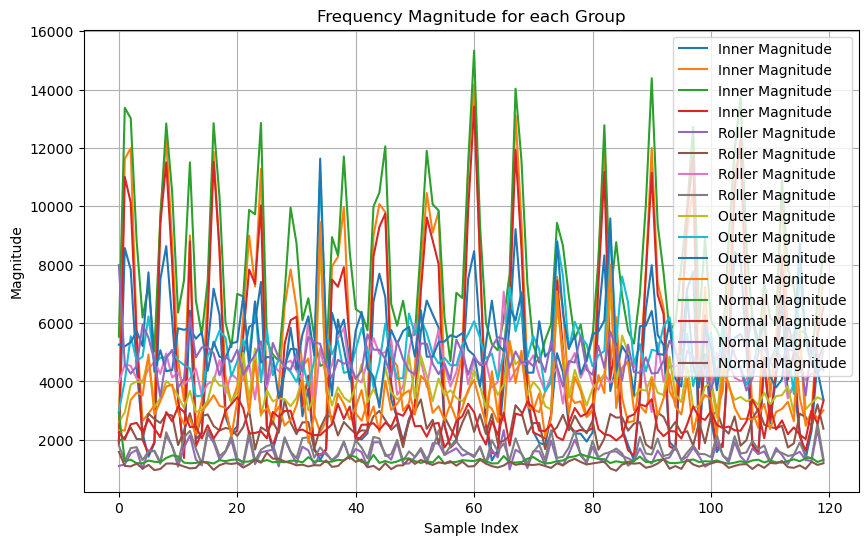

In [5]:
# 1. 각 인덱스 그룹을 다른 데이터프레임/넘파이로 만들기
inner = data1.iloc[0:120, :]   # 0 ~ 119
roller = data1.iloc[120:240, :]  # 120 ~ 239
outer = data1.iloc[240:360, :]  # 240 ~ 359
normal = data1.iloc[360:480, :]  # 360 ~ 479

# 필요한 주파수와 샘플링 레이트 설정
sampling_rate = 25600  # 25.6 kHz 샘플링 레이트
ftf_freq = 11
bpfo_freq = 140
bpfi_freq = 219.7
bsf_freq = 64.69

# 주파수와 진폭의 세기를 계산하는 함수
def calculate_fft_magnitude(data_group, sampling_rate, target_freqs, bandwidth=20):
    fft_magnitudes = []
    frequencies = np.fft.fftfreq(data_group.shape[1], d=1/sampling_rate)
    
    for _, signal in data_group.iterrows():
        # FFT 변환
        fft_values = np.fft.fft(signal)
        fft_magnitude = np.abs(fft_values)[:len(fft_values)//2]  # 양수 주파수만 선택
        pos_frequencies = frequencies[:len(frequencies)//2]  # 양수 주파수

        group_magnitudes = {}
        for freq in target_freqs:
            # 주파수 범위 설정: 음수 주파수는 0Hz로 제한
            low_bound = max(0, freq - bandwidth)  # 음수가 나오지 않도록 처리
            high_bound = freq + bandwidth

            # 주파수 대역 설정
            freq_range = (pos_frequencies >= low_bound) & (pos_frequencies <= high_bound)
            # 대역 내에서 진폭 합산
            magnitude_in_range = np.sum(fft_magnitude[freq_range])
            group_magnitudes[f'Freq_{freq}Hz'] = magnitude_in_range
        
        fft_magnitudes.append(group_magnitudes)
    
    return pd.DataFrame(fft_magnitudes)

# 2. 각 인덱스 그룹에서 주파수의 세기를 계산
target_frequencies = [ftf_freq, bpfo_freq, bpfi_freq, bsf_freq]

# 각 그룹의 주파수 세기를 계산
inner_magnitude = calculate_fft_magnitude(inner, sampling_rate, target_frequencies)
roller_magnitude = calculate_fft_magnitude(roller, sampling_rate, target_frequencies)
outer_magnitude = calculate_fft_magnitude(outer, sampling_rate, target_frequencies)
normal_magnitude = calculate_fft_magnitude(normal, sampling_rate, target_frequencies)

# 3. 그래프를 그리기 위한 예시
plt.figure(figsize=(10, 6))
plt.plot(inner_magnitude, label="Inner Magnitude")
plt.plot(roller_magnitude, label="Roller Magnitude")
plt.plot(outer_magnitude, label="Outer Magnitude")
plt.plot(normal_magnitude, label="Normal Magnitude")
plt.legend()
plt.grid(True)
plt.title("Frequency Magnitude for each Group")
plt.xlabel("Sample Index")
plt.ylabel("Magnitude")
plt.show()

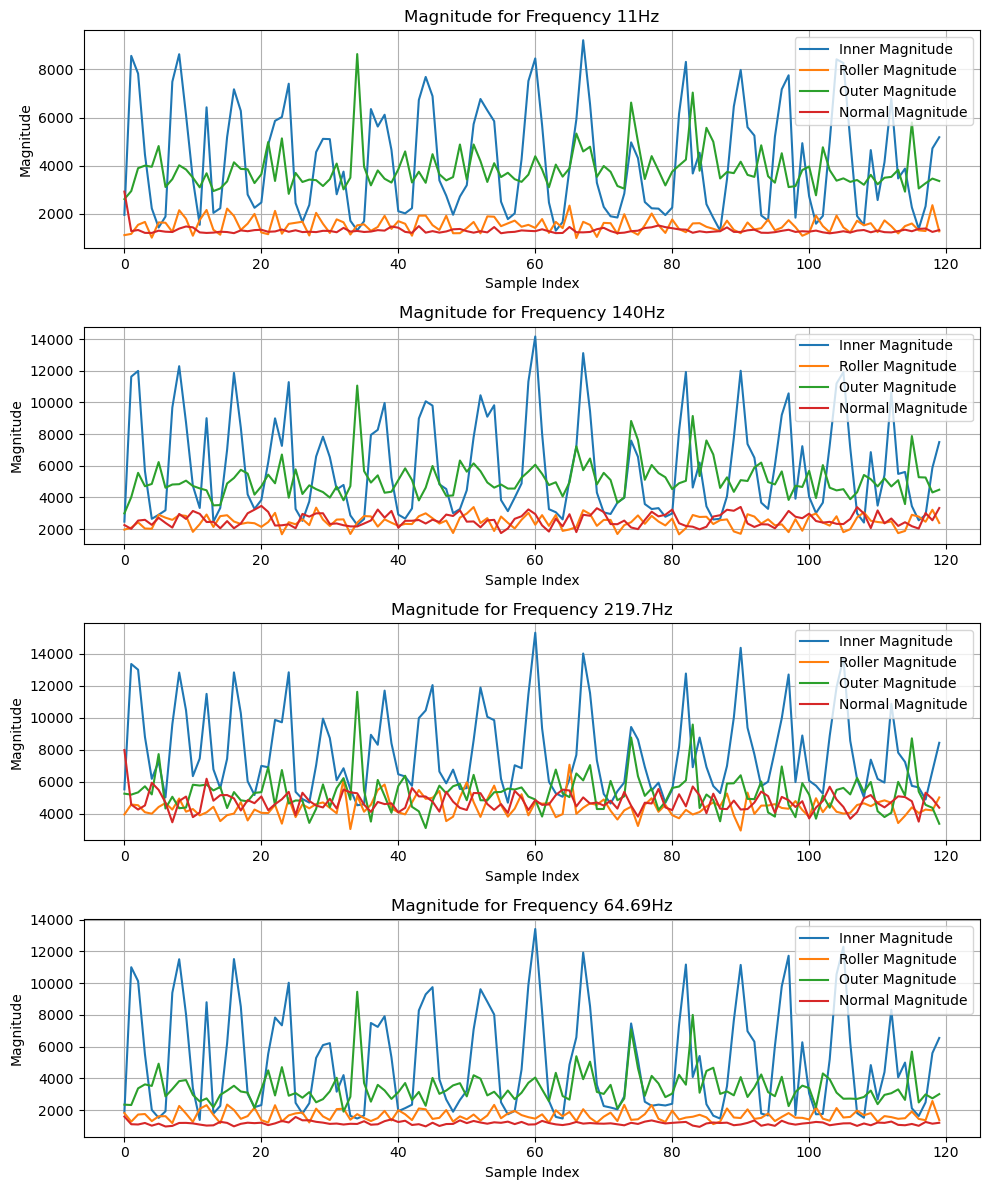

In [6]:
# 주파수별로 차트를 분리하여 그리기
plt.figure(figsize=(10, 12))

# 각 주파수마다 별도의 차트를 생성
for idx, freq in enumerate(target_frequencies):
    plt.subplot(4, 1, idx + 1)
    plt.plot(inner_magnitude[f'Freq_{freq}Hz'], label='Inner Magnitude')
    plt.plot(roller_magnitude[f'Freq_{freq}Hz'], label='Roller Magnitude')
    plt.plot(outer_magnitude[f'Freq_{freq}Hz'], label='Outer Magnitude')
    plt.plot(normal_magnitude[f'Freq_{freq}Hz'], label='Normal Magnitude')
    
    plt.title(f'Magnitude for Frequency {freq}Hz')
    plt.xlabel('Sample Index')
    plt.ylabel('Magnitude')
    plt.legend()
    plt.grid(True)

plt.tight_layout()
plt.show()

### 범위 +-40

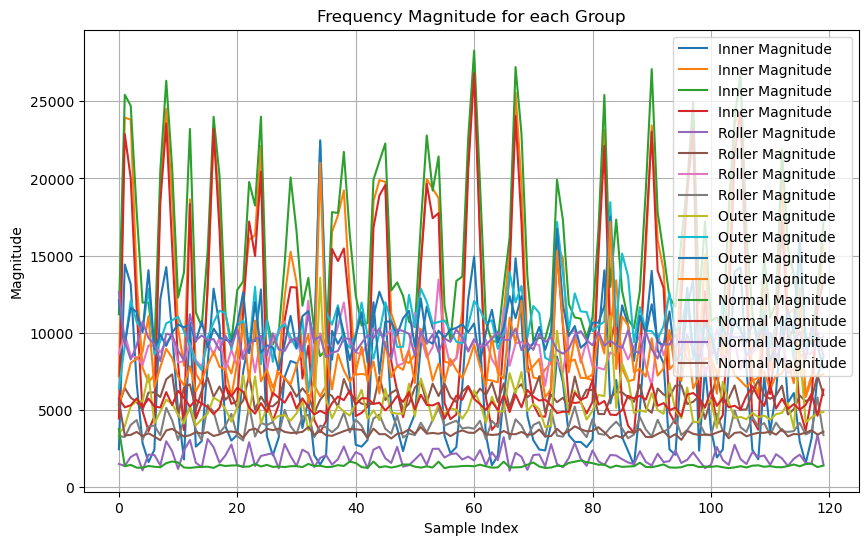

In [7]:
# 1. 각 인덱스 그룹을 다른 데이터프레임/넘파이로 만들기
inner = data1.iloc[0:120, :]   # 0 ~ 119
roller = data1.iloc[120:240, :]  # 120 ~ 239
outer = data1.iloc[240:360, :]  # 240 ~ 359
normal = data1.iloc[360:480, :]  # 360 ~ 479

# 필요한 주파수와 샘플링 레이트 설정
sampling_rate = 25600  # 25.6 kHz 샘플링 레이트
ftf_freq = 11
bpfo_freq = 140
bpfi_freq = 219.7
bsf_freq = 64.69

# 주파수와 진폭의 세기를 계산하는 함수
def calculate_fft_magnitude(data_group, sampling_rate, target_freqs, bandwidth=40):
    fft_magnitudes = []
    frequencies = np.fft.fftfreq(data_group.shape[1], d=1/sampling_rate)
    
    for _, signal in data_group.iterrows():
        # FFT 변환
        fft_values = np.fft.fft(signal)
        fft_magnitude = np.abs(fft_values)[:len(fft_values)//2]  # 양수 주파수만 선택
        pos_frequencies = frequencies[:len(frequencies)//2]  # 양수 주파수

        group_magnitudes = {}
        for freq in target_freqs:
            # 주파수 범위 설정: 음수 주파수는 0Hz로 제한
            low_bound = max(0, freq - bandwidth)  # 음수가 나오지 않도록 처리
            high_bound = freq + bandwidth

            # 주파수 대역 설정
            freq_range = (pos_frequencies >= low_bound) & (pos_frequencies <= high_bound)
            # 대역 내에서 진폭 합산
            magnitude_in_range = np.sum(fft_magnitude[freq_range])
            group_magnitudes[f'Freq_{freq}Hz'] = magnitude_in_range
        
        fft_magnitudes.append(group_magnitudes)
    
    return pd.DataFrame(fft_magnitudes)

# 2. 각 인덱스 그룹에서 주파수의 세기를 계산
target_frequencies = [ftf_freq, bpfo_freq, bpfi_freq, bsf_freq]

# 각 그룹의 주파수 세기를 계산
inner_magnitude = calculate_fft_magnitude(inner, sampling_rate, target_frequencies)
roller_magnitude = calculate_fft_magnitude(roller, sampling_rate, target_frequencies)
outer_magnitude = calculate_fft_magnitude(outer, sampling_rate, target_frequencies)
normal_magnitude = calculate_fft_magnitude(normal, sampling_rate, target_frequencies)

# 3. 그래프를 그리기 위한 예시
plt.figure(figsize=(10, 6))
plt.plot(inner_magnitude, label="Inner Magnitude")
plt.plot(roller_magnitude, label="Roller Magnitude")
plt.plot(outer_magnitude, label="Outer Magnitude")
plt.plot(normal_magnitude, label="Normal Magnitude")
plt.legend()
plt.grid(True)
plt.title("Frequency Magnitude for each Group")
plt.xlabel("Sample Index")
plt.ylabel("Magnitude")
plt.show()

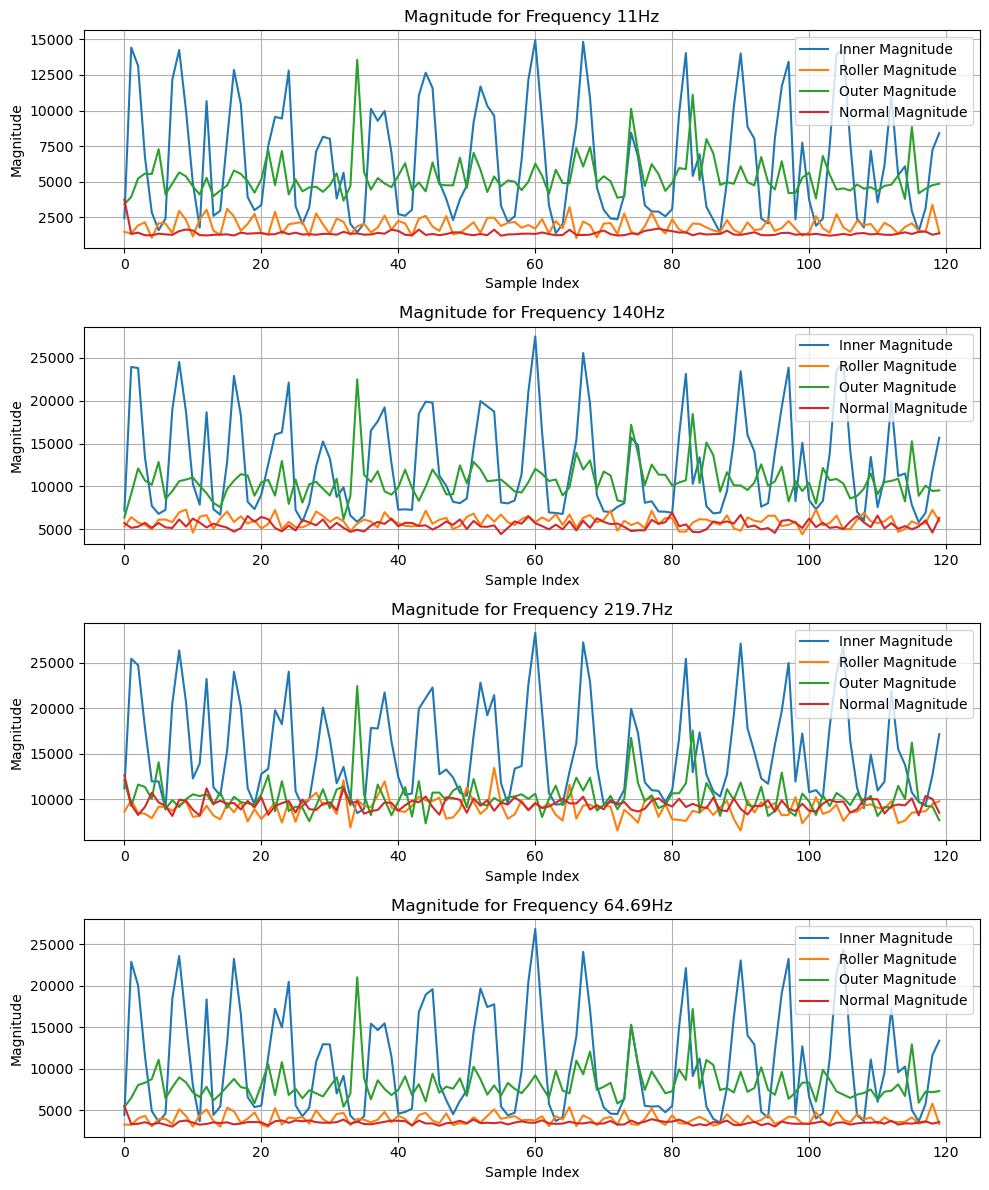

In [8]:
# 주파수별로 차트를 분리하여 그리기
plt.figure(figsize=(10, 12))

# 각 주파수마다 별도의 차트를 생성
for idx, freq in enumerate(target_frequencies):
    plt.subplot(4, 1, idx + 1)
    plt.plot(inner_magnitude[f'Freq_{freq}Hz'], label='Inner Magnitude')
    plt.plot(roller_magnitude[f'Freq_{freq}Hz'], label='Roller Magnitude')
    plt.plot(outer_magnitude[f'Freq_{freq}Hz'], label='Outer Magnitude')
    plt.plot(normal_magnitude[f'Freq_{freq}Hz'], label='Normal Magnitude')
    
    plt.title(f'Magnitude for Frequency {freq}Hz')
    plt.xlabel('Sample Index')
    plt.ylabel('Magnitude')
    plt.legend()
    plt.grid(True)

plt.tight_layout()
plt.show()